In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        # First Convolutional layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        # Second Convolutional layer
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Dropout layer
        self.dropout = nn.Dropout2d(p=0.25)
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 12 * 12, 128)  # Adjusted input size after max pooling
        self.fc2 = nn.Linear(128, 10)  # Output layer with 10 classes (assuming it's a classification task)

    def forward(self, x):
        # First Convolutional layer followed by ReLU activation
        x = F.relu(self.conv1(x))
        # Second Convolutional layer followed by ReLU activation
        x = F.relu(self.conv2(x))
        # Max pooling layer
        x = self.pool(x)
        # Dropout layer
        x = self.dropout(x)
        # Flatten the output for the fully connected layers
        x = x.view(-1, 64 * 12 * 12)
        # First fully connected layer followed by ReLU activation
        x = F.relu(self.fc1(x))
        # Dropout layer
        x = F.dropout(x, training=self.training)
        # Output layer with softmax activation
        x = self.fc2(x)
        return F.softmax(x, dim=1)  # Applying softmax activation on output

# Create an instance of the CNN model
model = MyCNN()
print(model)

MyCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout2d(p=0.25, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [2]:
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define data transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize the image data
])

# Load MNIST dataset
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define your model
model = MyCNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification tasks
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if (i+1) % 100 == 0:    # Print every 100 mini-batches
            print('[Epoch %d, Mini-batch %5d] Loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:03<00:00, 2837518.21it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 499059.42it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 918675.17it/s] 


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4358391.39it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

[Epoch 1, Mini-batch   100] Loss: 2.038
[Epoch 1, Mini-batch   200] Loss: 1.731
[Epoch 1, Mini-batch   300] Loss: 1.694
[Epoch 1, Mini-batch   400] Loss: 1.684
[Epoch 1, Mini-batch   500] Loss: 1.670
[Epoch 1, Mini-batch   600] Loss: 1.667
[Epoch 1, Mini-batch   700] Loss: 1.652
[Epoch 1, Mini-batch   800] Loss: 1.644
[Epoch 1, Mini-batch   900] Loss: 1.635
[Epoch 2, Mini-batch   100] Loss: 1.592
[Epoch 2, Mini-batch   200] Loss: 1.574
[Epoch 2, Mini-batch   300] Loss: 1.566
[Epoch 2, Mini-batch   400] Loss: 1.562
[Epoch 2, Mini-batch   500] Loss: 1.559
[Epoch 2, Mini-batch   600] Loss: 1.548
[Epoch 2, Mini-batch   700] Loss: 1.540
[Epoch 2, Mini-batch   800] Loss: 1.538
[Epoch 2, Mini-batch   900] Loss: 1.538
[Epoch 3, Mini-batch   100] Loss: 1.527
[Epoch 3, Mini-batch   200] Loss: 1.527
[Epoch 3, Mini-batch   300] Loss: 1.523
[Epoch 3, Mini-batch   400] Loss: 1.525
[Epoch 3, Mini-batch   500] Loss: 1.513
[Epoc

Accuracy on the validation set: 97.94%


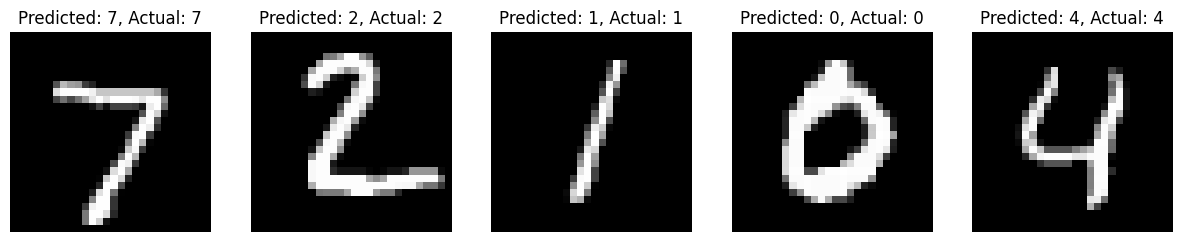

In [3]:
import matplotlib.pyplot as plt

# Load MNIST validation dataset
val_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Set the model to evaluation mode
model.eval()

# Initialize variables for accuracy calculation
correct = 0
total = 0

# Initialize lists to store images, labels, and predicted labels
visualize_images_list = []
labels_list = []
predicted_labels_list = []

# Evaluate the model on the validation set
with torch.no_grad():  # Disable gradient tracking during validation
    for images, labels in val_loader:
        # Forward pass
        outputs = model(images)
        # Get the predicted labels
        _, predicted = torch.max(outputs.data, 1)
        # Calculate accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # Append images, labels, and predicted labels to lists for visualization
        visualize_images_list.append(images)
        labels_list.append(labels)
        predicted_labels_list.append(predicted)

# Calculate and print accuracy
accuracy = 100 * correct / total
print('Accuracy on the validation set: {:.2f}%'.format(accuracy))

# Function to display a batch of images with their predicted labels
def visualize_images(images, labels, predicted_labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f'Predicted: {predicted_labels[i]}, Actual: {labels[i]}')
        ax.axis('off')
    plt.show()

# Concatenate and convert lists to tensors
visualize_images_tensor = torch.cat(visualize_images_list, dim=0)
labels_tensor = torch.cat(labels_list, dim=0)
predicted_labels_tensor = torch.cat(predicted_labels_list, dim=0)

# Convert tensors to numpy arrays for visualization
visualize_images_np = visualize_images_tensor.cpu().numpy()
labels_np = labels_tensor.cpu().numpy()
predicted_labels_np = predicted_labels_tensor.cpu().numpy()

# Visualize a subset of images with their predicted labels
visualize_images(visualize_images_np, labels_np, predicted_labels_np)
